In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

In [120]:
df_neg_pi_mc = pd.read_parquet("/home/mdicosta/hf_pid_studies/distributions/distributions/k0s/pp/neg_pi_eff_df_mc.parquet", engine="pyarrow") 
df_pos_pi_mc = pd.read_parquet("/home/mdicosta/hf_pid_studies/distributions/distributions/k0s/pp/pos_pi_eff_df_mc.parquet", engine="pyarrow") 
df_neg_pi = pd.read_parquet("/home/mdicosta/hf_pid_studies/distributions/distributions/k0s/pp/neg_pi_eff_df.parquet", engine="pyarrow") 
df_pos_pi = pd.read_parquet("/home/mdicosta/hf_pid_studies/distributions/distributions/k0s/pp/pos_pi_eff_df.parquet", engine="pyarrow") 

In [121]:
df_neg_pi_mc

,fPt,fNSigmaTpcPosPi,fNSigmaTpcPosPi_unc,fNSigmaTpcNegPi,fNSigmaTpcNegPi_unc,fNSigmaTofPosPi,fNSigmaTofPosPi_unc,fNSigmaTofNegPi,fNSigmaTofNegPi_unc
0,"[0.2, 0.3)","[0.8797251957181659, 0.8757842040794589, 0.870...","[0.0007506677212165286, 0.00076115633101259, 0...","[1.0, 1.0, 1.0]","[0.0, 0.0, 0.0]","[0.9972679341747883, 0.9550087873462214, 0.681...","[0.00012045876432560365, 0.0004783595296206109...","[0.9971401182297491, 0.9543590562922725, 0.681...","[0.00012323640802295856, 0.000481637290116692,..."
1,"[0.3, 0.4)","[0.8513543422928452, 0.8462995631993855, 0.839...","[0.0006417954792490855, 0.0006506762748492886,...","[0.9651535962816615, 0.9640404382327477, 0.962...","[0.0003308587015287528, 0.0003359078733320712,...","[0.9974449442444521, 0.9550082347656835, 0.684...","[9.107727326087151e-05, 0.0003739688570800903,...","[0.9972561630548702, 0.954389813627398, 0.6818...","[9.437302513870264e-05, 0.00037640829329884854..."
2,"[0.4, 0.5)","[0.8341728148695365, 0.8287841429133367, 0.821...","[0.000665115089787544, 0.0006736489374403759, ...","[0.8081888625584839, 0.8015657529909528, 0.792...","[0.0007040998655693412, 0.0007132122780201038,...","[0.9972241143869546, 0.9536574211766813, 0.681...","[9.40888346074834e-05, 0.00037594751233922276,...","[0.9971729459885574, 0.9543194123309444, 0.683...","[9.494961694062076e-05, 0.00037338222613044587..."
3,"[0.5, 0.6)","[0.8219817621855258, 0.8159012356834663, 0.808...","[0.0007422456639229331, 0.00075201856429612, 0...","[0.7595161181015203, 0.7509092552013915, 0.740...","[0.0008292697312438014, 0.0008391833406385569,...","[0.9973268273582278, 0.9540101354658473, 0.682...","[0.00010018820231299667, 0.0004064357384216544...","[0.997153635891296, 0.9537842335524582, 0.6799...","[0.00010337382718424551, 0.0004073844792230346..."
4,"[0.6, 0.7)","[0.8083033769459523, 0.8015261991044617, 0.793...","[0.0008670031309913265, 0.0008784897379986122,...","[0.7327405121935837, 0.723314559046829, 0.7115...","[0.0009746931317749265, 0.0009853329252263656,...","[0.9973512246947359, 0.9534232752640286, 0.682...","[0.00011320689010495887, 0.0004641449032690307...","[0.9974676543784838, 0.9538065229730319, 0.683...","[0.0001106973280625087, 0.00046232428721380034..."
5,"[0.7, 0.8)","[0.7921469526718967, 0.7849022492890557, 0.775...","[0.0010422939344026706, 0.0010554431746905512,...","[0.7521559260749939, 0.7439544995678251, 0.733...","[0.0011090531120665286, 0.0011210910770879656,...","[0.9972288019847056, 0.9544995678250714, 0.683...","[0.00013503312572677606, 0.0005353092690013253...","[0.9971562229890669, 0.9538925434979117, 0.683...","[0.00013678500981912164, 0.0005386968599163757..."
6,"[0.8, 0.9)","[0.7749915406915598, 0.7674284616861916, 0.757...","[0.0012628287708210126, 0.0012775967473855265,...","[0.745617163708195, 0.737413920820873, 0.72697...","[0.001317038330839386, 0.0013307242740585794, ...","[0.9971284077295216, 0.9538899101027005, 0.684...","[0.00016182048417450476, 0.0006342254653178623...","[0.9969820845565036, 0.9548501559256313, 0.682...","[0.00016587990373379, 0.0006279026310862404, 0..."
7,"[0.9, 1.0)","[0.7648164967444002, 0.7570132910339887, 0.746...","[0.001516888509721307, 0.0015339620744365407, ...","[0.7419441495145382, 0.7336932188863162, 0.723...","[0.001564999029720692, 0.0015809567011004792, ...","[0.9971857290880483, 0.9538971256060277, 0.681...","[0.00018947093085228706, 0.000750043380020194,...","[0.9973520269146636, 0.9548693282847018, 0.683...","[0.000183803015028353, 0.0007424709755266508, ..."
8,"[1.0, 1.5)","[0.7559395523004838, 0.7480625329798529, 0.738...","[0.00108302264774491, 0.0010946130795275128, 0...","[0.7326518026867057, 0.7242979662159155, 0.714...","[0.001115919183399003, 0.001126740538602062, 0...","[0.9973043937110997, 0.9548867400329322, 0.683...","[0.00013073365368198515, 0.000523327237583632,...","[0.9973552542071167, 0.9550011761489704, 0.682...","[0.00012949774609761146, 0.000522694387345088,..."
9,"[1.5, 2.0)","[0.746869437591731, 0.73

In [122]:
def convert_to_interval(interval_str):
    match = re.match(r"(\[|\()(\d+(\.\d+)?),\s*(\d+(\.\d+)?)(\]|\))", interval_str)
    if match:
        # Extract the left and right bounds, converting them to float
        left = float(match.group(2))  # Group 2 captures the left bound
        right = float(match.group(4))  # Group 4 captures the right bound
        
        # Determine if the interval is closed on the left or right
        closed = 'left' if match.group(1) == '[' else 'right'
        # Return the interval as a pandas Interval
        return pd.Interval(left, right, closed=closed)
    
    # If the string doesn't match the interval format, return None
    return None  

def sort_df_by_interval(df, col):
    # Use .loc[] to safely modify the DataFrame and avoid the SettingWithCopyWarning
    df.loc[:, "lower_bound"] = df[col].apply(lambda x: x.left)  # Extract left bound
    df_sorted = df.sort_values("lower_bound").drop(columns="lower_bound")  # Sort and drop helper column
    return df_sorted

In [123]:
interval_cols = ['fPt']

for col in interval_cols:
    df_neg_pi_mc[col] = df_neg_pi_mc[col].apply(convert_to_interval) 
    df_pos_pi_mc[col] = df_pos_pi_mc[col].apply(convert_to_interval) 
    df_neg_pi[col] = df_neg_pi[col].apply(convert_to_interval) 
    df_pos_pi[col] = df_pos_pi[col].apply(convert_to_interval)

In [124]:
def draw_efficiencies(df_data, df_mc, diff_col_name, eff_var):
    
    sort_df_data = sort_df_by_interval(df_data, diff_col_name)
    sort_df_mc = sort_df_by_interval(df_mc, diff_col_name)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

    lower_bin_bounds = sort_df_data[diff_col_name].apply(lambda x: x.left)
    upper_bin_bounds = sort_df_data[diff_col_name].apply(lambda x: x.right)

    bin_centers = (np.array(lower_bin_bounds) + np.array(upper_bin_bounds)) / 2
    bin_widths = (np.array(upper_bin_bounds) - np.array(lower_bin_bounds)) / 2
    
    n_sigma_vals = [3,2,1]
    for icase, n_sigma in enumerate(n_sigma_vals):
        n_sigma_effs_data = []
        n_sigma_effs_uncs_data = []
        n_sigma_effs_mc = []
        n_sigma_effs_uncs_mc = []
        for entry in range(len(sort_df_data)):
            n_sigma_effs_data.append(sort_df_data.loc[entry, eff_var][icase])
            n_sigma_effs_uncs_data.append(sort_df_data.loc[entry, f"{eff_var}_unc"][icase])
            n_sigma_effs_mc.append(sort_df_mc.loc[entry, eff_var][icase])
            n_sigma_effs_uncs_mc.append(sort_df_mc.loc[entry, f"{eff_var}_unc"][icase])
        
        ax1.errorbar(bin_centers, n_sigma_effs_data, yerr=n_sigma_effs_uncs_data, 
                    xerr=bin_widths, label=f'data, |{eff_var}| < {n_sigma}', fmt='o')
        ax1.errorbar(bin_centers, n_sigma_effs_mc, yerr=n_sigma_effs_uncs_mc, 
                    xerr=bin_widths, label=f'mc, |{eff_var}| < {n_sigma}', fmt='o')

        ratio = np.array(n_sigma_effs_data) / np.array(n_sigma_effs_mc)
        ratio_unc = ratio * np.sqrt((np.array(n_sigma_effs_uncs_data) / np.array(n_sigma_effs_data))**2 + (np.array(n_sigma_effs_uncs_mc) / np.array(n_sigma_effs_mc))**2)
        ax2.errorbar(bin_centers, ratio, yerr=ratio_unc, xerr=bin_widths, label=f'|{eff_var}| < {n_sigma}', fmt='o')

    # min_eff = 1
    # max_eff = 0
    # if np.array(effs).flatten()[np.array(effs).flatten()!=0].min() < min_eff:
    #     min_eff = np.array(effs).flatten()[np.array(effs).flatten()!=0].min()
    # if np.array(effs).flatten().max() > max_eff:
    #     max_eff = np.array(effs).flatten().max()

    # min_ratio = 1000
    # max_ratio = 0
    # if ratio[~np.isnan(ratio)].min() < min_ratio:
    #     min_ratio = ratio[~np.isnan(ratio)].min()
    # if ratio[~np.isnan(ratio)].max() > max_ratio:
    #     max_ratio = ratio[~np.isnan(ratio)].max()

    ax1.set_ylabel('Efficiency')
    # ax1.set_ylim(min_eff.min()/2, 1.2)
    ax1.legend()
    ax1.set_yscale('log')
    ax1.grid(True)

    ax2.set_xlabel(r'$p_T$ (GeV/$c$)')
    ax2.set_ylabel('Data / MC')
    # ax2.set_ylim(min_ratio*0.95, max_ratio*1.05)
    ax2.legend()
    ax2.grid(True)

    return fig

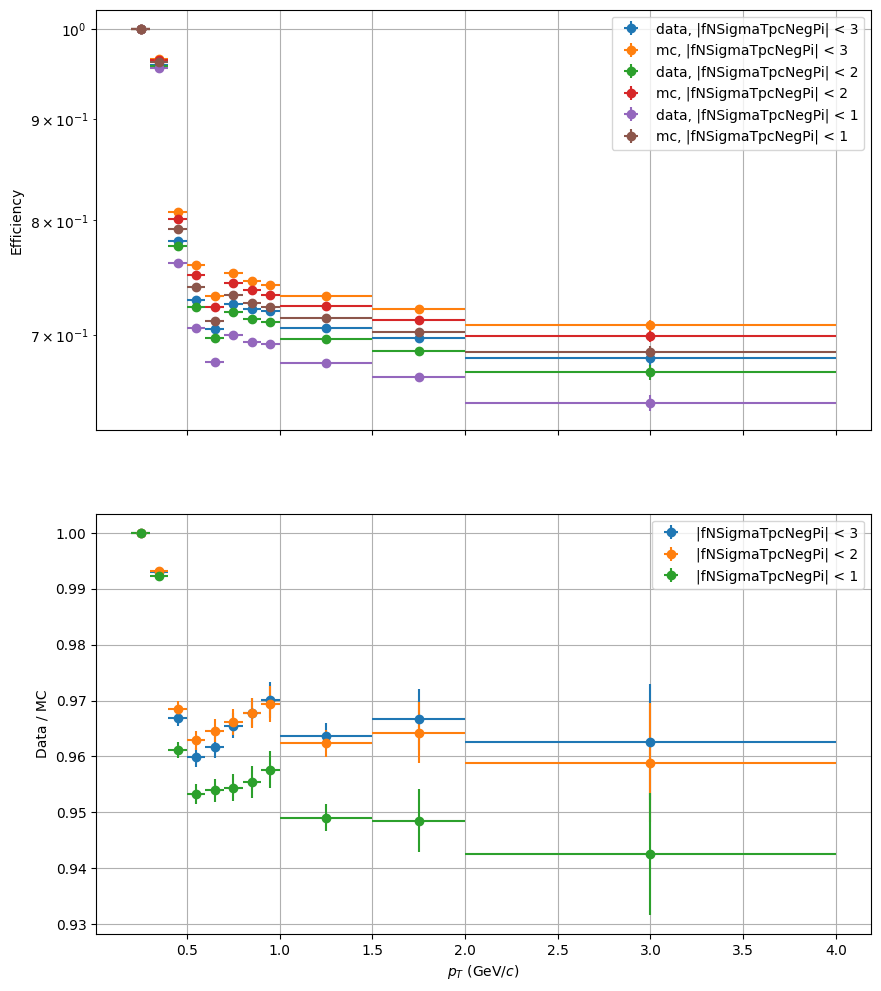

In [125]:
fig_occ_neg_pi = draw_efficiencies(df_neg_pi, df_neg_pi_mc, 'fPt', 'fNSigmaTpcNegPi')

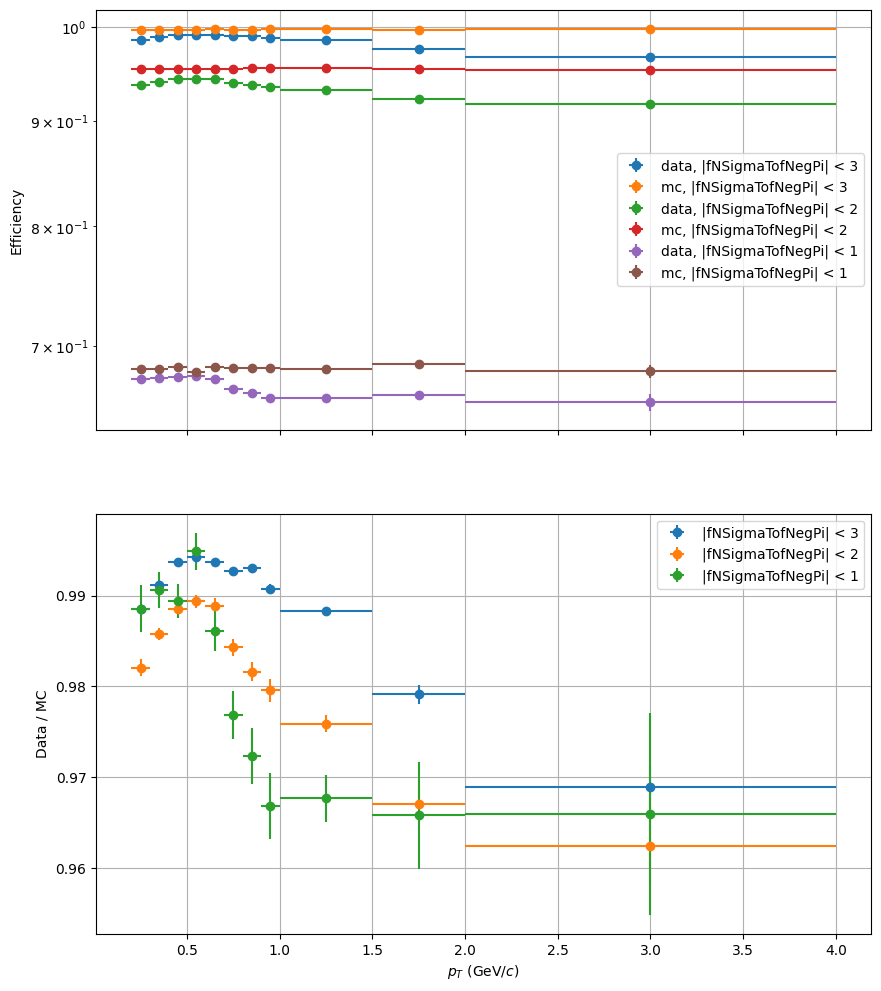

In [126]:
fig_occ_neg_pi = draw_efficiencies(df_neg_pi, df_neg_pi_mc, 'fPt', 'fNSigmaTofNegPi')

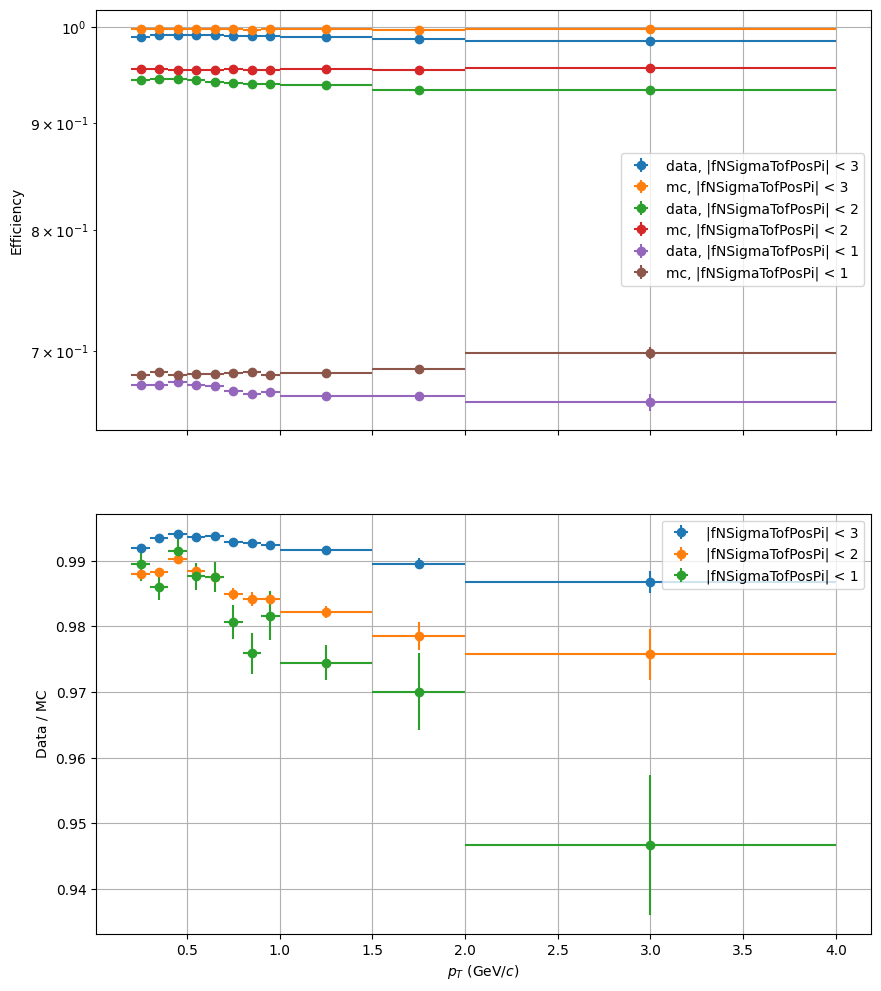

In [127]:
fig_occ_neg_pi = draw_efficiencies(df_neg_pi, df_neg_pi_mc, 'fPt', 'fNSigmaTofPosPi')